# Facemask detection using CNN

The the main purpose of this notebook is to detect the facemask given the face image

In [ ]:
Import the packages such as numpy and keras

In [12]:
import numpy as np
import keras
import keras.backend as k
from keras.layers import Conv2D,MaxPooling2D,SpatialDropout2D,Flatten,Dropout,Dense
from keras.models import Sequential,load_model
from keras.optimizers import Adam
from keras.preprocessing import image

import datetime

In [26]:
!zip -r train

/bin/sh: 1: zip: not found


In [10]:
!pip install -r requirements.txt

/opt/conda/lib/python3.7/site-packages/secretstorage/dhcrypto.py:16: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
/opt/conda/lib/python3.7/site-packages/secretstorage/util.py:25: CryptographyDeprecationWarning: int_from_bytes is deprecated, use int.from_bytes instead
  from cryptography.utils import int_from_bytes
  Using cached absl_py-0.11.0-py3-none-any.whl (127 kB)
  Using cached cachetools-4.2.0-py3-none-any.whl (12 kB)
  Using cached certifi-2020.12.5-py2.py3-none-any.whl (147 kB)
  Using cached chardet-4.0.0-py2.py3-none-any.whl (178 kB)
  Using cached DateTime-4.3-py2.py3-none-any.whl (60 kB)
  Using cached gast-0.3.3-py2.py3-none-any.whl (9.7 kB)
  Using cached google_auth-1.24.0-py2.py3-none-any.whl (114 kB)
  Using cached google_auth_oauthlib-0.4.2-py2.py3-none-any.whl (18 kB)
  Using cached grpcio-1.32.0-cp37-cp37m-manylinux2014_x86_64.whl (3.8 MB)
  Using cached h5py-2.10.0-cp37-cp3

In [ ]:
Create the CNN Network layers

In [13]:
model=Sequential()
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Conv2D(32,(3,3),activation='relu'))
model.add(MaxPooling2D() )
model.add(Flatten())
model.add(Dense(100,activation='relu'))
model.add(Dense(1,activation='sigmoid'))

In [14]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])


Create the images dataset with ImageDataGenerator from the images folders
Augument the images with below :
Scale
Shear
Zoom
Horizontal Flip

In [15]:
from keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

In [16]:
test_datagen = ImageDataGenerator(rescale=1./255)

Traing the Model

In [17]:
training_set = train_datagen.flow_from_directory(
        'train',
        target_size=(150,150),
        batch_size=16 ,
        class_mode='binary')

test_set = test_datagen.flow_from_directory(
        'test',
        target_size=(150,150),
        batch_size=16,
        class_mode='binary')

model_saved=model.fit_generator(
        training_set,
        epochs=10,
        validation_data=test_set,

        )

Found 1314 images belonging to 2 classes.
Found 195 images belonging to 2 classes.


/opt/conda/lib/python3.7/site-packages/keras/engine/training.py:1915: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
83/83 [==============================] - 44s 397ms/step - loss: 0.5054 - accuracy: 0.7319 - val_loss: 0.1160 - val_accuracy: 0.9641
Epoch 2/10
83/83 [==============================] - 26s 311ms/step - loss: 0.1328 - accuracy: 0.9515 - val_loss: 0.1278 - val_accuracy: 0.9487
Epoch 3/10
83/83 [==============================] - 26s 310ms/step - loss: 0.1484 - accuracy: 0.9593 - val_loss: 0.0840 - val_accuracy: 0.9692
Epoch 4/10
83/83 [==============================] - 26s 314ms/step - loss: 0.0977 - accuracy: 0.9714 - val_loss: 0.0653 - val_accuracy: 0.9744
Epoch 5/10
83/83 [==============================] - 26s 309ms/step - loss: 0.0952 - accuracy: 0.9599 - val_loss: 0.0749 - val_accuracy: 0.9590
Epoch 6/10
83/83 [==============================] - 26s 310ms/step - loss: 0.0967 - accuracy: 0.9647 - val_loss: 0.0631 - val_accuracy: 0.9744
Epoch 7/10
83/83 [==============================] - 26s 311ms/step - loss: 0.0612 - accuracy: 0.9730 - val_loss: 0.0719 - val_accuracy: 0.9590

In [18]:
test_image=image.load_img(r'./test/with_mask/1-with-mask.jpg', target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


Sample image with mask for testing

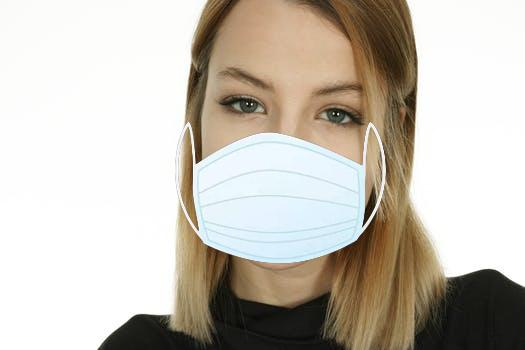

In [40]:
from IPython.display import Image
Image(filename='./test/with_mask/1-with-mask.jpg') 

In [19]:
pred=model.predict(test_image)[0][0]

In [20]:
pred

0.0

In [21]:
test_image=image.load_img(r'./test/without_mask/0.jpg', target_size=(150,150,3))
test_image
test_image=image.img_to_array(test_image)
test_image=np.expand_dims(test_image,axis=0)


In [ ]:
Sample image without mask for testing

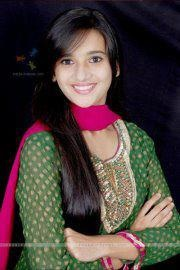

In [38]:
Image(filename='./test/without_mask/0.jpg') 

Prediction of sample images

In [22]:
pred=model.predict(test_image)[0][0]

In [23]:
pred

1.0

In [28]:
test_image=image.load_img(r'./test/without_mask/0.jpg', target_size=(150,150,3))
